## Titanic Data Exploration ##

***

Over the past several weeks, you've learned the code about how to explore and manipulate a dataset. Now it's time to practice what you've learned on a real-world dataset. 

***

### Titanic Dataset

The titanic dataset holds information about the passengers on the titanic. This includes passenger name, characteristics, and if they survived the accident. The dataset has the following columns:

    * pclass = passenger class; 1 = first class, 2 = second class, 3 = third class
    * survived = passenger survival; 1 = survived, 0 = did not survive
    * name = passenger name
    * sex = sex of passenger
    * age = age of passenger
    * sibsp = # of siblings / spouses aboard the Titanic
    * parch = # of parents / children aboard the Titanic
    * ticket = ticket number
    * fare = fare paid by passenger
    * cabin = passenger cabin
    * embarked = port of embarkation; C = Cherbourg, Q = Queenstown, S = Southampton
    * boat = lifeboat assignment 
    * body = recovered body number
    * home dest = anticipated home destination 
    
If you need some additional motivation before starting, please visit: https://www.youtube.com/watch?v=3gK_2XdjOdY

### How to work through the dataset:

Follow the prompts below to explore, manipulate, and visualize aspects of the dataset. Working with data takes time, so take your time as you start with a messy dataset and turn it into something that shows meaningful visualizations. 

***


In [ ]:
### typical libraries



### Import Libraries and Dataset

* Review the entire notebook to determine what you will be expected to do - then, import the necessary libraries
* Import the titanic.xlsx dataset

In [128]:
import pandas as pd
import numpy as np

In [129]:
from matplotlib import pyplot as plt

%matplotlib inline

In [130]:
import seaborn as sns

In [131]:
df = pd.read_excel("titanic.xlsx")
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### Determine the Characteristics of the Dataset

   * How many columns are in this dataset?
   * How many rows are in this dataset?
   * What types of data are in each column? Does this make sense with that you know about that column?
   * Which variables are numeric? Which variables are categorical? What other variables are left outside of these two groups?
   * Which variable could be considered a 'dependent' variable?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [8]:
df.shape

(1309, 14)

In [ ]:
#Which variables are numeric? Which variables are categorical?
fare
survived
pclass
age
#categorical
sex

In [ ]:
#Which variable could be considered a 'dependent' variable?
cabin

### Identify the Missing Data in the Dataset

   * Is there any missing data?
   * Which columns have any missing data?
   * Which column has the most missing information? Which column has the least?

In [23]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest


In [35]:
df.loc[df.isnull().any(axis = 1)]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [43]:
df = df.copy()

df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest


### Handling the Missing Data in the Dataset

   * Remove the columns with excessive missing data (any column missing greater than 500 rows)
   * When there is very little missing data, we can make replacements. Replace the missing data for the "embarked" column with the most common embarkation point. 
   * Replace the missing data in "fare" with the average fare of the entire sample. 
   * Remove the rows in the dataset that has missing "age" data. 
   * Recheck is there is any data missing in the dataset. 

In [45]:
df.dropna(inplace=True)

#check
df.isnull().sum()

pclass       0.0
survived     0.0
name         0.0
sex          0.0
age          0.0
sibsp        0.0
parch        0.0
ticket       0.0
fare         0.0
cabin        0.0
embarked     0.0
boat         0.0
body         0.0
home.dest    0.0
dtype: float64

In [51]:
#Remove the rows in the dataset that has missing "age" data.

df.dropna(subset=["age"], inplace = True)

## check the changes

df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### Creating Columns and Replacing Labels

   * Create descriptive labels for the categorical columns: pclass, survived, and embarked. Instead of the coding that shows in the dataset, create labels to describe what each category represents (i.e. in the embarked column S = Southhampton)
   * Create a new column called "Titanic Passenger" and make all values 1
   * Create a new column called "Family Size" - this column should equal the total number of family members each passenger was traveling with.
   * Create a column called "Travel Alone" - this column should be 1 if the passenger was traveling alone, and 0 if the passenger was traveling with family. 
   * Create a column called "Has Caregiver" - this column should have a value of 1 if a passenger is less than 13-years old AND the passenger is traveling with at least one family member, otherwise the value should be 0. 
   * Create a column called "Crew" - this column should be 1 if the passenger paid 0 dollars for their ticket, and 0 otherwise. 
   * Create a column called "Age Group" to group passengers by their age (create five categories: infant, child, teen, adult, senior). You can use bins to complete this (or any other method you like). You define the cutoff points for each group you create. 
   
After create new columns, replace the basic coding "0/1" with meaningful labels. 

In [52]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1046.000000,1046.000000,1046.000000,1046.000000,1046.00000,1045.000000,120.00000
mean,2.207457,0.408222,29.881135,0.502868,0.42065,36.686080,160.87500
std,0.841497,0.491740,14.413500,0.912167,0.83975,55.732533,98.10392
min,1.000000,0.000000,0.166700,0.000000,0.00000,0.000000,1.00000
25%,1.000000,0.000000,21.000000,0.000000,0.00000,8.050000,71.50000
50%,2.000000,0.000000,28.000000,0.000000,0.00000,15.750000,155.50000
75%,3.000000,1.000000,39.000000,1.000000,1.00000,35.500000,256.50000
max,3.000000,1.000000,80.000000,8.000000,6.00000,512.329200,328.00000


In [53]:
#Create a new column called "Titanic Passenger" and make all values 1
df["Titanic Passenger"] = 1

df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Titanic Passenger
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [56]:
#Create a new column called "Family Size" - 
#this column should equal the total number of family members each passenger was traveling with.
df["Family Size"] = df["parch"] + df["sibsp"]
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Titanic Passenger,Family Size
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1,3
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,3
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1,3
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,3


In [63]:
#Create a column called "Travel Alone" - 
#this column should be 1 if the passenger was traveling alone, and 0 if the passenger was traveling with family.
df["Travel Alone"] = np.where(((df["parch"] == 2) & (df["sibsp"] ==1)), "Alone", "With Family")
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Titanic Passenger,Family Size,Travel Alone,Has Caregiver,Crew
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,0,With Family,1,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1,3,Alone,0,0
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,3,Alone,0,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1,3,Alone,1,0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,3,Alone,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,3,0,"Youseff, Mr. Gerious",male,45.5000,0,0,2628,7.2250,NaN,C,NaN,312.0,NaN,1,0,With Family,1,0
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,1,1,With Family,1,0
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,1,0,With Family,1,0
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,1,0,With Family,1,0


In [59]:
#Create a column called "Has Caregiver" - 
#this column should have a value of 1 if a passenger is less than 13-years old AND 
#the passenger is traveling with at least one family member, 
#otherwise the value should be 0.

df["Has Caregiver"] = np.where(df["age"] >= 13, 1, 0)
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Titanic Passenger,Family Size,Travel Alone,Has Caregiver
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,0,0,1
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1,3,1,0
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,3,1,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1,3,1,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,3,0,"Youseff, Mr. Gerious",male,45.5000,0,0,2628,7.2250,NaN,C,NaN,312.0,NaN,1,0,0,1
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,1,1,0,1
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,1,0,0,1
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,1,0,0,1


In [61]:
#Create a column called "Crew" - 
#this column should be 1 if the passenger paid 0 dollars for their ticket, and 0 otherwise.
df["Crew"] = np.where(df["ticket"] == 0, 1, 0)
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Titanic Passenger,Family Size,Travel Alone,Has Caregiver,Crew
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,0,0,1,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1,3,1,0,0
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,3,1,0,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1,3,1,1,0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,3,0,"Youseff, Mr. Gerious",male,45.5000,0,0,2628,7.2250,NaN,C,NaN,312.0,NaN,1,0,0,1,0
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,1,1,0,1,0
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,1,0,0,1,0
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,1,0,0,1,0


In [ ]:
#Create a column called "Age Group" 
#to group passengers by their age (create five categories: infant, child, teen, adult, senior). 
#You can use bins to complete this (or any other method you like). 
#You define the cutoff points for each group you create.

In [66]:
### Convert number grades into letter grades

#infant = 0 - 2  
#3child = 2.1-13
#teen = 13.1 - 18
#adult = 18.1 - 65 
#senior =  65+

#### STEP 1: create the bin limits ####

bins = [0, 2, 13, 18, 65,150]

## the bin limits are the cutoff points for the values
## each number shown is the cutoff for a specific group (0-60, 60.1 - 70, 70.1 - 80...)

bin_labels = ["infant", "child", "teen", "adult", "senior"]

## the bin labels are the group names that will be created
## there should always be one less group than bins

#### STEP 2: apply your bins to a specific column (or create new column) in dataset  ####
## new column = pd.cut(column to apply to, bin cutoff list, labels = list of bin labels)
# pd.cut function segments and organizes values into the appropriate bin

df["Age Group"] = pd.cut(df["age"], bins, labels = bin_labels)

#### STEP 3: check changes  ####

df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Titanic Passenger,Family Size,Travel Alone,Has Caregiver,Crew,Age Group
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,0,With Family,1,0,adult
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1,3,Alone,0,0,infant
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,3,Alone,0,0,infant
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1,3,Alone,1,0,adult
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,3,Alone,1,0,adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,3,0,"Youseff, Mr. Gerious",male,45.5000,0,0,2628,7.2250,NaN,C,NaN,312.0,NaN,1,0,With Family,1,0,adult
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,1,1,With Family,1,0,teen
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,1,0,With Family,1,0,adult
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,1,0,With Family,1,0,adult


### Determine Frequencies of Groups

* How many passengers fall into each category? Determine how many passengers fall into each group for <b>each</b> categorical vairable (including the ones you just created). 

In [67]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest',
       'Titanic Passenger', 'Family Size', 'Travel Alone', 'Has Caregiver',
       'Crew', 'Age Group'],
      dtype='object')

In [68]:
df["pclass"].value_counts()

3    501
1    284
2    261
Name: pclass, dtype: int64

In [69]:
df["survived"].value_counts()

0    619
1    427
Name: survived, dtype: int64

In [70]:
df["age"].value_counts()

24.0000    47
22.0000    43
21.0000    41
30.0000    40
18.0000    39
           ..
0.3333      1
22.5000     1
70.5000     1
0.6667      1
26.5000     1
Name: age, Length: 98, dtype: int64

In [71]:
df["Travel Alone"].value_counts()

With Family    1021
Alone            25
Name: Travel Alone, dtype: int64

In [72]:
df["Age Group"].value_counts()

adult     843
teen       94
child      65
infant     34
senior     10
Name: Age Group, dtype: int64

In [73]:
df["Has Caregiver"].value_counts()

1    952
0     94
Name: Has Caregiver, dtype: int64

In [74]:
df["Family Size"].value_counts()

0     590
1     206
2     144
3      39
5      25
4      17
6      16
7       8
10      1
Name: Family Size, dtype: int64

### Determine the Distribution of Numeric Data

* What are the summary statistics for <b>each</b> numeric variable in the dataset? Summary statistics include:
    * Mean
    * Median
    * Mode
    * Standard Deviation
    * Range

In [75]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body,Titanic Passenger,Family Size,Has Caregiver,Crew
count,1046.000000,1046.000000,1046.000000,1046.000000,1046.00000,1045.000000,120.00000,1046.0,1046.000000,1046.000000,1046.0
mean,2.207457,0.408222,29.881135,0.502868,0.42065,36.686080,160.87500,1.0,0.923518,0.910134,0.0
std,0.841497,0.491740,14.413500,0.912167,0.83975,55.732533,98.10392,0.0,1.452891,0.286127,0.0
min,1.000000,0.000000,0.166700,0.000000,0.00000,0.000000,1.00000,1.0,0.000000,0.000000,0.0
25%,1.000000,0.000000,21.000000,0.000000,0.00000,8.050000,71.50000,1.0,0.000000,1.000000,0.0
50%,2.000000,0.000000,28.000000,0.000000,0.00000,15.750000,155.50000,1.0,0.000000,1.000000,0.0
75%,3.000000,1.000000,39.000000,1.000000,1.00000,35.500000,256.50000,1.0,1.000000,1.000000,0.0
max,3.000000,1.000000,80.000000,8.000000,6.00000,512.329200,328.00000,1.0,10.000000,1.000000,0.0


In [76]:
df["age"].median()

28.0

In [77]:
df["age"].mode()

0    24.0
dtype: float64

In [78]:
df["age"].mean()

29.8811345124283

In [79]:
age_range = df['age'].max() - df['age'].min()
print(age_range)

79.8333


In [80]:
print("Mean age:", df["age"].mean())

df["age"].std()

Mean age: 29.8811345124283


14.413499699923594

In [84]:
df["fare"].median()

15.75

In [85]:
df["fare"].mode()

0    13.0
dtype: float64

In [86]:
df["fare"].mean()

36.686080287081474

In [88]:
fare_range = df['fare'].max() - df['fare'].min()
print(fare_range)

512.3292


In [89]:
print("Mean fare:", df["fare"].mean())

df["fare"].std()

Mean fare: 36.686080287081474


55.73253318137776

### Relationships between Variables

* Determine the relationship between each variable and the variable "survived". This is our primary variable of interest -- did this passenger survive the accident? Did the characteristics of the passenger have any relationship with their survival?
    * <b>pclass</b>: how many survivors are in each passenger class? does a pattern emerge? which class has the most survivors? which has the least?
    * <b>sex</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>age</b>: how does the average age of the passenger differ based on survival group? 
    * <b>age group</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>family size</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>travel alone</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>crew</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>has caregiver</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>fare</b>: how does the average fare the passenger paid differ based on survival group? 
    * <b>embarked</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    
Based on what you learn working through this section, make (2) statements about what characteristics of passenger most influenced their survival.

In [90]:
ins = pd.read_excel("titanic.xlsx")
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Titanic Passenger,Family Size,Travel Alone,Has Caregiver,Crew,Age Group
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,0,With Family,1,0,adult
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1,3,Alone,0,0,infant
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,3,Alone,0,0,infant
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1,3,Alone,1,0,adult
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,3,Alone,1,0,adult


In [102]:
pd.crosstab(df["pclass"], df["survived"], margins=True)
               

survived,0,1,All
pclass,,,
1,103,181,284
2,146,115,261
3,370,131,501
All,619,427,1046


In [101]:
pd.crosstab(df["Age Group"], df["survived"], margins=True)

survived,0,1,All
Age Group,,,
infant,13,21,34
child,29,36,65
teen,56,38,94
adult,513,330,843
senior,8,2,10
All,619,427,1046


In [103]:
pd.crosstab(df["sex"], df["survived"], margins=True)

survived,0,1,All
sex,,,
female,96,292,388
male,523,135,658
All,619,427,1046


In [105]:
df["age"].groupby(df["survived"]).mean()


survived
0    30.545369
1    28.918228
Name: age, dtype: float64

In [108]:
df["fare"].groupby(df["survived"]).mean()

survived
0    25.148752
1    53.384134
Name: fare, dtype: float64

In [106]:
pd.crosstab(df["Crew"], df["survived"], margins=True)

survived,0,1,All
Crew,,,
0,619,427,1046
All,619,427,1046


In [107]:
pd.crosstab(df["Travel Alone"], df["survived"], margins=True)

survived,0,1,All
Travel Alone,,,
Alone,7,18,25
With Family,612,409,1021
All,619,427,1046


### Visualize your Results

* Using the most interesting (from your POV) results from the above section, create (3) visualizations to illustrate the results. 
* Create a barplot to show the variation in average age across passenger class. On average, which passenger class has the oldest passengers?
* Create a violin plot to show the distribution of age across passenger class. 

In [113]:
## typical libraries

import pandas as pd
import numpy as np
### matplotlib.pyplot is a 2D plotting library that creates high-quality figures

from matplotlib import pyplot as plt

### this command allows you to view your plots in the notebook

%matplotlib inline
### seaborn is complimentary to matplotlib and allows for further plot customization 

import seaborn as sns

In [114]:
df = pd.read_excel("titanic.xlsx")
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


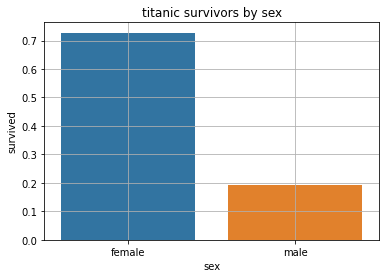

In [120]:
sns.barplot(data = df, x = "sex", y = "survived", ci = None)

plt.title('titanic survivors by sex')
plt.grid()

<AxesSubplot:xlabel='survived', ylabel='age'>

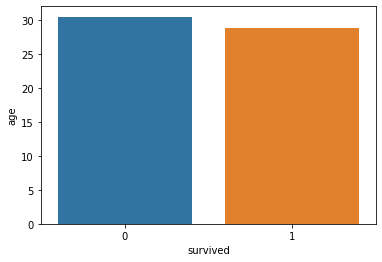

In [123]:
sns.barplot(data = df, x = "survived", y = "age", ci = None)


In [133]:
df = df.copy()

df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


<AxesSubplot:xlabel='survived', ylabel='sex'>

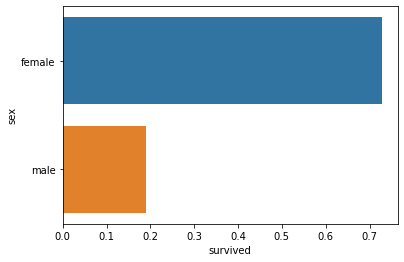

In [132]:
sns.barplot(data = df, x = "survived", y = "sex", ci = None)